In [51]:
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
import copy
import math

%matplotlib inline

In [52]:
def load_data(url):
    response = urllib.request.urlopen(url)
    data = np.genfromtxt(response, delimiter=',')
    X_train = data[:, :2]
    y_train = data[:, 2]
    return X_train, y_train
github_raw_url = 'https://raw.githubusercontent.com/ankitasak08/Machine-Learning/main/logisticregression/data.txt'
X_train, y_train = load_data(github_raw_url)

In [53]:
print("First five elements in X_train are:\n", X_train[:5])

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]


In [10]:
print("First five elements in y_train are:\n", y_train[:5])

First five elements in y_train are:
 [0. 0. 0. 1. 1.]


In [11]:
print ('Dimension of X_train: ' + str(X_train.shape))
print ('Dimension of y_train is: ' + str(y_train.shape))
print ('Number of training examples m = %d' % (len(y_train)))

Dimension of X_train: (100, 2)
Dimension of y_train is: (100,)
Number of training examples m = 100


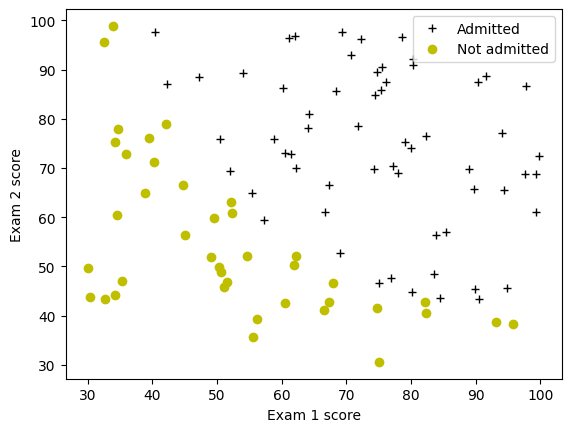

In [17]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label) #The positive class is represented by black crosses ('k+'), and the negative class is represented by yellow circles ('yo').
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc="upper right")
plt.show()

## Sigmoid Function

In [19]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g
value = -6
print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(-6) = 0.0024726231566347743


## Cost function for logistic regression

In [29]:
def compute_cost(X, y, w, b, *argv):
    m, n = X.shape
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m
    return total_cost
test_w = np.array([0.1, 0.1]) #values can be changed according to the dataset
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)
print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))

Cost at test w and b (non-zeros): 5.480


## Gradient for logistic regression

In [31]:
def compute_gradient(X, y, w, b, lambda_=None):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_db, dj_dw
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())


dj_db at test_w: -0.5999999999991071
dj_dw at test_w: [-44.831353617873795, -44.37384124953978]


## Finding the optimal parameters of a logistic regression model by using gradient descent.

In [33]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8
iterations = 100000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.96   
Iteration 10000: Cost     0.30   
Iteration 20000: Cost     0.30   
Iteration 30000: Cost     0.30   
Iteration 40000: Cost     0.29   
Iteration 50000: Cost     0.29   
Iteration 60000: Cost     0.29   
Iteration 70000: Cost     0.28   
Iteration 80000: Cost     0.28   
Iteration 90000: Cost     0.28   
Iteration 99999: Cost     0.28   


## Plotting the decision boundary

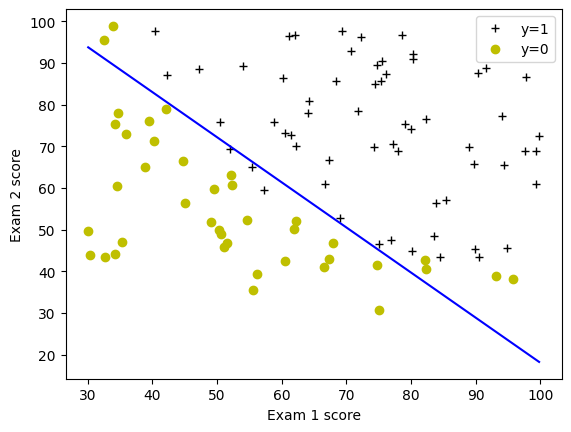

In [54]:
def plot_decision_boundary(w, b, X, y):
    plot_data(X[:, 0:2], y)
    plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
    plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
    plt.plot(plot_x, plot_y, c="b")
plot_decision_boundary(w, b, X_train, y_train)
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc="upper right")
plt.show()

## Evaluating logistic regression

In [55]:
def predict(X, w, b):
    m, n = X.shape
    p = np.zeros(m)
    for i in range(m):
        z_wb = np.dot(X[i],w)
        for j in range(n):
            z_wb += 0
        z_wb += b
        f_wb = sigmoid(z_wb)
        p[i] = 1 if f_wb>0.5 else 0
    return p
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (4,), value [0. 1. 1. 1.]


###  ***Computing the accuracy on the training set***



In [56]:
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 91.000000
